<a href="https://colab.research.google.com/github/Borg-JK/borgML/blob/main/TMDL_2024_25_Assignment_3%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [3]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [4]:
df = pd.read_csv("/content/tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

Columns: homepage, overview, release_date, runtime, tagline.

All have null values in there columns, for homepage you could apply a web scraping algorithm. However I don't think that column is important for our analysis..

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [6]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [7]:
df = df.dropna(subset=['overview']).reset_index(drop=True)

df.head()


,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [8]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))

    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

df.head()

100%|██████████| 4800/4800 [00:01<00:00, 3126.22it/s]


,title,overview,genres,proc_genres,one_hot_genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Verify that one-hot encodings are indeed as expected

In [9]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4800/4800 [00:01<00:00, 3273.05it/s]


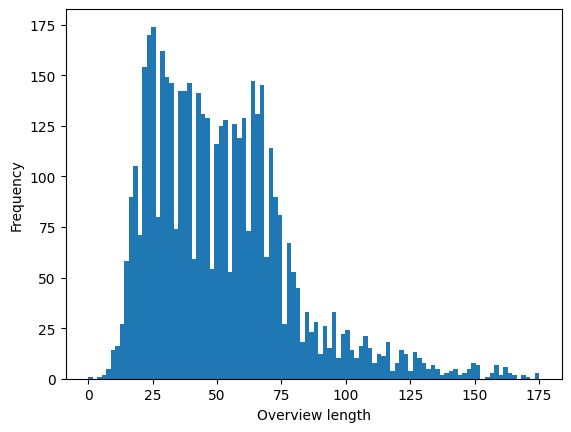

[28, 34, 41, 65, 55, 44, 84, 69, 30, 60, 55, 60, 23, 68, 60, 75, 47, 74, 109, 74, 116, 44, 32, 34, 37, 116, 47, 93, 26, 92, 58, 22, 102, 28, 23, 32, 67, 36, 82, 42, 41, 64, 45, 51, 14, 72, 38, 100, 96, 44, 45, 130, 51, 70, 18, 96, 30, 71, 60, 107, 66, 30, 25, 65, 20, 67, 49, 53, 22, 129, 41, 51, 34, 18, 70, 66, 50, 111, 36, 62, 73, 117, 34, 75, 85, 118, 57, 47, 29, 114, 35, 58, 65, 60, 28, 35, 44, 81, 32, 40, 15, 53, 87, 69, 26, 24, 56, 71, 55, 35, 62, 41, 39, 53, 42, 63, 68, 23, 96, 43, 51, 45, 27, 31, 66, 159, 65, 110, 43, 62, 47, 64, 77, 35, 28, 36, 55, 122, 36, 40, 77, 20, 44, 66, 30, 95, 140, 43, 29, 75, 106, 18, 26, 103, 39, 77, 64, 29, 75, 19, 105, 12, 25, 65, 56, 30, 44, 38, 54, 57, 59, 63, 30, 51, 47, 85, 25, 14, 48, 28, 57, 58, 62, 79, 79, 38, 58, 56, 81, 19, 92, 38, 54, 102, 21, 40, 27, 72, 35, 47, 14, 37, 48, 43, 55, 35, 77, 47, 28, 19, 43, 71, 62, 58, 54, 47, 36, 60, 20, 39, 41, 46, 111, 57, 124, 50, 41, 45, 79, 107, 104, 66, 21, 27, 56, 54, 36, 34, 75, 107, 55, 56, 42, 55

In [10]:
import re
import scipy.stats as stats

def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total=len(df)):
    overview = row["overview"]
    overview = remove_punctuation(overview)
    overview = overview.lower()
    processed_overviews.append(overview)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for overview in df["proc_overview"]:
    overview_lens.append(len(overview.split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens

# plot a histogram of the overview lengths
plt.hist(overview_lens, bins=100)
plt.xlabel("Overview length")
plt.ylabel("Frequency")
plt.show()

print(overview_lens)
print(np.mean(overview_lens))
print(min(overview_lens))
print(max(overview_lens))

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview is of length 0, and the longest overview is of length 15. The mean overview length is 51.9 so it would make sense to put it around this number.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [11]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])

# print to verify
df

<ipython-input-11-46068307d10d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [12]:
# hint: store all words for all movies in a set, change it to a list and sort
vocab = sorted(list(set([word for overview in df["proc_overview"] for word in overview])))
print(vocab)
vocab_len = len(list(set([word for overview in df["proc_overview"] for word in overview])))
print(vocab_len)

['00', '007', '1', '10', '100', '1000', '100000', '10191', '101yearold', '10th', '10year', '10yearold', '11', '11000', '117', '118', '119', '11th', '11year', '11yearold', '12', '1200', '1214', '1215', '1250', '12hour', '12year', '12yearold', '13', '1300', '1314', '13year', '13yearold', '14', '1408', '1429', '14year', '14yearold', '15', '1520s', '1536', '15th', '15year', '15yearold', '16', '1600s', '1630s', '16th', '16yearold', '17', '1700s', '17th', '17thcentury', '17yearold', '18', '180', '1800', '1800s', '1818', '1820', '1820s', '1831', '1834', '1836', '1839', '1841', '1845', '1850', '1850s', '1856', '1862', '1863', '1870s', '1875', '1876', '1879', '1880s', '1882', '18891971', '1890', '1890s', '18month', '18th', '18thcentury', '18thwedding', '18yearold', '19', '1900', '1905', '1910', '1914', '1919', '1920', '1920s', '1921', '1924', '1925', '19261929', '1927', '1930s', '1931', '1932', '1933', '1937', '1940s', '1941', '1942', '194344', '1944', '19441945', '1945', '1946', '1947', '1949'

### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [13]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(vocab))
    for word in row["proc_overview"]:
        sentence_encode += encode_labels(word, vocab) # get encoding for this word
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:17<00:00, 263.05it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4794,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4795,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4797,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

Total bytes = n * 16

64-bit float usually takes up 8 bytes.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

(4707, 12493)


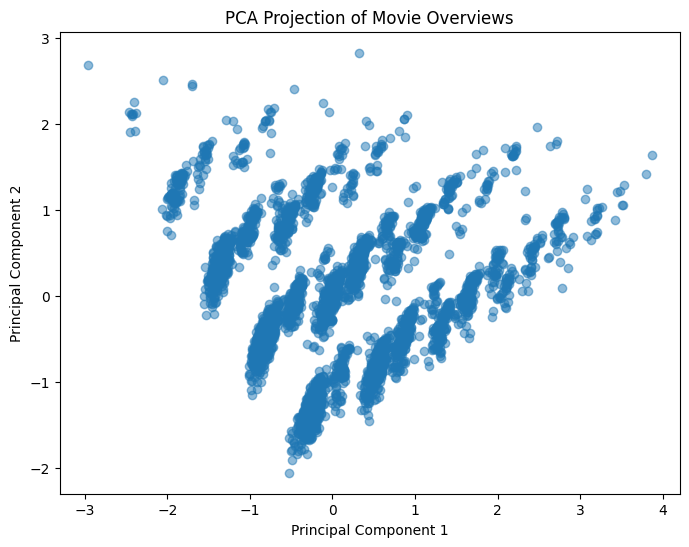

Variance lost: 0.8871


In [14]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=1226)
X = np.array(df["one_hot_overview"].to_list())
print(np.unique(X, axis=0).shape)

x_train_pca = pca.fit_transform(X)

# Scatter plot of the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Movie Overviews")
plt.show()

powers = pca.explained_variance_ratio_
variance_retained_2D = np.sum(powers[:2])
variance_loss = 1 - variance_retained_2D
print(f"Variance lost: {variance_loss:.4f}")

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

As there exists, aruguably, 5/6 clusters, we can interpret something from the chart. Maybe that some certain movie types like romance and comedy get similar descriptions (just as an example).

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

Variance lost: 0.8871

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

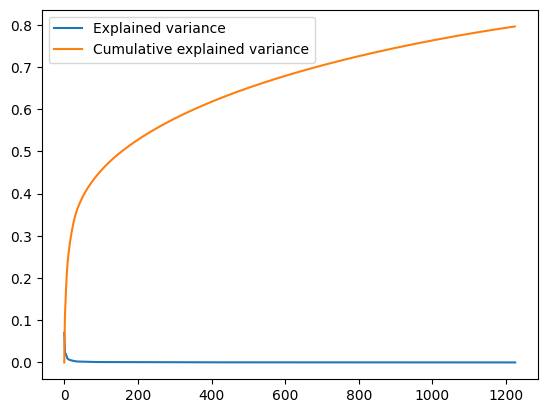

In [15]:
powers = pca.explained_variance_ratio_
# print(powers[:2])
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [16]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:")
print(cumulative_variance)

num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(num_components_80)

Cumulative Explained Variance:
[0.0699188  0.11288451 0.13622265 ... 0.7961966  0.7963222  0.79644752]
1


We need 1226 PCA components to explain 80% of the variance.

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [17]:
n_dims = num_components_80
pca = PCA(n_components=n_dims)
x_train_pca = pca.fit_transform(X)
labels_pca = pca.transform(X)
df["overview_pca"] = labels_pca.tolist()
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.1713055802505986]
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.3780729330832607]
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-1.9128810324243686]
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.8229543711027908]
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.10117960271160276]
...,...,...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.16452915353465758]
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.43961687234761315]
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.39072083154362247]
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.30154465027213306]


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [18]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20, random_state=42)

# fit model
kmeans.fit(x_train_pca)

y_preds = kmeans.fit_predict(x_train_pca)# get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_0_movies = df[df["cluster_kmeans"] == 0]
print(cluster_0_movies["title"])
print(cluster_0_movies.shape)

86      Shrek Forever After
118             Ratatouille
135             The Wolfman
214       The Perfect Storm
236             Windtalkers
               ...         
4738             Queen Crab
4750                Hayride
4759      George Washington
4777            Dutch Kills
4786                  Clean
Name: title, Length: 198, dtype: object
(198, 10)


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

Switches between largely science fiction like superhero movies to harry potter, which I can see could be grouped in the same area. But then also includes Cheap Thrills and Mars needs Moms.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

The first proper kink is at 3, therefore elbow method is applicable.

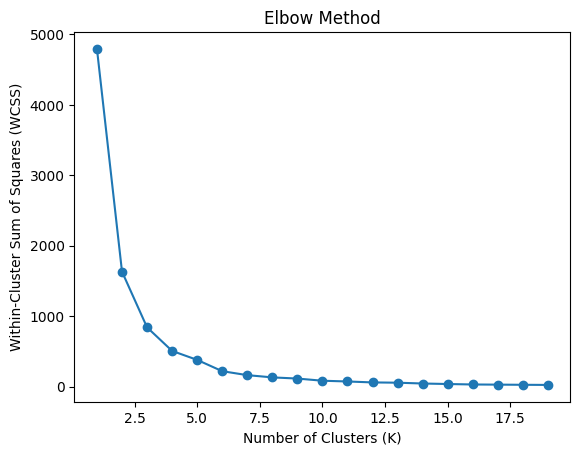

In [19]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(20)
gmm.fit(x_train_pca)
y_preds = gmm.predict(x_train_pca)
df["cluster_gmm"] = y_preds
cluster_0_movies = df[df["cluster_gmm"] == 0]
print(cluster_0_movies["title"])

29                       Skyfall
38      The Amazing Spider-Man 2
40                        Cars 2
45                   World War Z
57                        WALL·E
                  ...           
4718      The Work and The Story
4743                Tiger Orange
4763              The Last Waltz
4773       In the Company of Men
4784    All Superheroes Must Die
Name: title, Length: 374, dtype: object


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

The Revenant and birth of a nation are a good combo. I don't know if the Hulk and 20 dates are the most compatible movies to be honest. I would say it is slightly better than K-means as I feel like I have gone more in a certain direction. But I am no movie expert.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

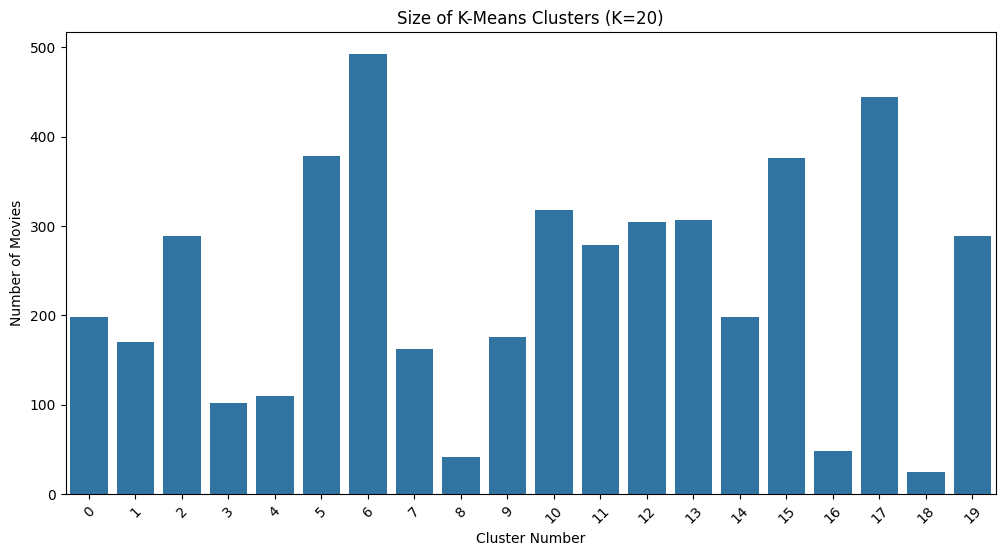

In [21]:
import seaborn as sns
# Create an array for the x-axis positions
cluster_counts = df["cluster_kmeans"].value_counts().sort_index()
# Plotting the bars
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
# Add labels, title, and legend
plt.xlabel("Cluster Number")
plt.ylabel("Number of Movies")
plt.title("Size of K-Means Clusters (K=20)")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Cluster 4, 13, 15 and 17 are not as occupied as the others. There seems to be a general trend that clusters 13+ are less "full" then the clusters prior. There are a multitude of reasons here. Potentially it could be the PCA transformation applied to the data prior or the use of K = 20, which might be too large for this dataset causing unique films to have there own cluster.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [22]:
prev_watch = "Avatar"

cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].values[0] # find what cluster index Avatar falls into for k-means
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].values[0] # find what cluster index Avatar falls into for gmm

kmeans_recommendations = df[df["cluster_kmeans"] == cluster_kmeans]["title"]
gmm_recommendations = df[df["cluster_gmm"] == cluster_gmm]["title"]
# print out similar movies
print("K-Means:")
print(kmeans_recommendations)
print("GMM:")
print(gmm_recommendations)

K-Means:
0                         Avatar
6                        Tangled
16                  The Avengers
23            The Golden Compass
31                    Iron Man 3
                  ...           
4704    When the Lights Went Out
4747                 The Dirties
4770                      Clerks
4776                     Slacker
4781             The Puffy Chair
Name: title, Length: 289, dtype: object
GMM:
0                   Avatar
6                  Tangled
16            The Avengers
23      The Golden Compass
25                 Titanic
               ...        
4747           The Dirties
4770                Clerks
4772           Funny Ha Ha
4776               Slacker
4781       The Puffy Chair
Name: title, Length: 452, dtype: object


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

In general both systems give some good suggestions but also some very poor ones. I would say that the systems could be applied and work, although not with the highest success rate, however at least the viewers would watch a large variety of movies (based on the poor suggestions).

**Q6.3** How would you try making the recommender systems better?

its very much depended on the dataset, in particular we made an assumption that a movie adheres to only one genre type earlier on, I would remove this constraint and allow movies to be catagorized by more genres.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

find the clusers of all the movies, collect them. Rank recommendations based on frequency. Filter out already watched movies from the recommendation. So if the dentist has watched more movies from a particular cluster, then the recommendation within this cluster should be heavily weighted.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [23]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"] == prev_watch]["overview_pca"].values[0]

# calculate cosine similarity between previously watched film and all other films

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))

df["cos_sim_to_avatar"] = sims # add to df
df = df.sort_values(by="cos_sim_to_avatar", ascending=False) # sort df
df # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.8229543711027908],10,13,1.0
4799,My Date with Drew,Ever since the second grade when he first saw ...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[ever, since, the, second, grade, when, he, fi...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.3368062889612635],9,12,1.0
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.1713055802505986],2,10,1.0
4782,Stories of Our Lives,Created by the members of a Nairobi-based arts...,"[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[created, by, the, members, of, a, nairobibase...",45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.34611906653961555],15,7,1.0
4784,All Superheroes Must Die,"Masked vigilantes Charge (Jason Trost), Cutthr...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[masked, vigilantes, charge, jason, trost, cut...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.585195646563351],5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[captain, jack, sparrow, crosses, paths, with,...",74,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.8446446074593],17,14,-1.0
18,Men in Black 3,Agents J (Will Smith) and K (Tommy Lee Jones) ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[agents, j, will, smith, and, k, tommy, lee, j...",109,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-0.16994589109754407],6,3,-1.0
4765,The Exploding Girl,"On a summer break from college, Ivy, a young e...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[on, a, summer, break, from, college, ivy, a, ...",30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-1.4299928930159926],7,19,-1.0
4767,Mutual Appreciation,Alan is a musician who leaves a busted-up band...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[alan, is, a, musician, who, leaves, a, busted...",42,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[-1.9269452555358337],4,8,-1.0


I think this new approach is better, as its not restricted as heavily to the clustering. The suggested movies some more applicable, although not perfect, but I geuss that is personal preference and what a person deems similarity which is subjective.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [24]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

genres = sorted(list(set([word for overview in df["genres"] for word in overview])))
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(genres))
    for word in row["genres"]:
        sentence_encode += encode_labels(word, genres) # get encoding for this word
    encoded_labels.append(sentence_encode)

df["one_hot_genres"] = encoded_labels
df.head()

3765 942


100%|██████████| 4707/4707 [00:01<00:00, 2974.23it/s]


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[15.0, 24.0, 7.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.8229543711027908],10,13,1.0
4799,My Date with Drew,Ever since the second grade when he first saw ...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[3.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[ever, since, the, second, grade, when, he, fi...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.3368062889612635],9,12,1.0
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[16.0, 24.0, 7.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.1713055802505986],2,10,1.0
4782,Stories of Our Lives,Created by the members of a Nairobi-based arts...,"[{""id"": 18, ""name"": ""Drama""}]",Drama,"[3.0, 6.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[created, by, the, members, of, a, nairobibase...",45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.34611906653961555],15,7,1.0
4784,All Superheroes Must Die,"Masked vigilantes Charge (Jason Trost), Cutthr...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Thriller,"[8.0, 12.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,...","[masked, vigilantes, charge, jason, trost, cut...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.585195646563351],5,0,1.0


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data anipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import json
import re
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("/content/tmdb_5000_movies.csv")

df["genres"] = df["genres"].apply(lambda x: [item["name"] for item in json.loads(x)])
df = df[["title", "overview", "genres"]]
df = df.dropna(subset=['overview']).reset_index(drop=True)

genres = sorted(list(set([word for overview in df["genres"] for word in overview])))

encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(genres))
    for word in row["genres"]:
        sentence_encode += encode_labels(word, genres) # get encoding for this word
    encoded_labels.append(sentence_encode)

df["one_hot_genres"] = encoded_labels

def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))

    out[unique_labels.index(label)] = 1
    return out

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total=len(df)):
    overview = row["overview"]
    overview = remove_punctuation(overview)
    overview = overview.lower()
    processed_overviews.append(overview)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for overview in df["proc_overview"]:
    overview_lens.append(len(overview.split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
token_len =10 # number of words

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])

vocab = sorted(list(set([word for overview in df["proc_overview"] for word in overview])))

# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(vocab))
    for word in row["proc_overview"]:
        sentence_encode += encode_labels(word, vocab) # get encoding for this word
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels

X = np.array(df_train["one_hot_overview"].to_list())
pca = PCA(n_components=1226)

x_train_pca = pca.fit_transform(X)

powers = pca.explained_variance_ratio_

df = df.iloc[:X.shape[0]]

gmm = GaussianMixture(20)
gmm.fit(x_train_pca)
y_preds = gmm.predict(x_train_pca)
df["cluster_gmm"] = y_preds

df.drop(columns=["genres", "overview"], inplace=True)

modelrf = RFC(random_state=42)
multi_rf = MultiOutputClassifier(modelrf)
param_grid = {
    "n_estimators": [20, 30 ,40],          # Number of trees in the forest
    "max_depth": [None, 5, 10],         # Maximum depth of trees
    "min_samples_split": [3, 5, 7],         # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 5]            # Minimum samples at leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator = modelrf,
    param_grid = param_grid,
    scoring = "f1_macro",
    cv = 5,            # 5-fold cross-validation
    n_jobs = -1,       # Use all CPU cores for faster computation
    verbose = 2        # Print progress
)

df_train_x = df_train.drop(columns=["one_hot_genres"])
df_train_y = df_train["one_hot_genres"]
df_test_x = df_test.drop(columns=["one_hot_genres"])
df_test_y = df_test["one_hot_genres"]

# Fit the Grid Search to the data
grid_search.fit(df_train_x, df_train_y)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
test_score = best_rf.score(df_test_x, df_test_y)
train_score = best_rf.score(df_train_x, df_train_y)
print("Train Score:", train_score)
print("Test Score:", test_score)

100%|██████████| 4800/4800 [00:08<00:00, 561.21it/s]


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I was gonna apply a random forest regression due to us having to geuss the vector rather than a singular genre. However I think this is not possible or beyond the scope of this course. Apply a grid search to optimize the hyperparameters. A random forest with a small number of trees would probably be the most efficient as the data set does't contain a lot of usable variables. I was gonna incorporate it with the PCA and GMM clustering as I believe that was the best.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)